# Cleaning of the Brighten Dataset
Access on Synapse.org

In [2]:
############ LOAD in custom packages ################
import sys
import os
import pandas as pd
import importlib

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add project root to sys.path
sys.path.append(project_root)

# Import and reload custom scripts
from scripts import preprocessing as pre
from scripts import visualization as vis
importlib.reload(pre)
importlib.reload(vis)

import os
project_dir = '/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj'
brighten_dir = os.path.join(project_dir, 'BRIGHTEN_data')

 
# ############ LOAD in files  #############
raw_dfs = {}
raw_dfs['phq9'] = pd.read_csv(os.path.join(brighten_dir,'PHQ-9 - Depression.csv'))
raw_dfs['phq2'] = pd.read_csv(os.path.join(brighten_dir,'PHQ-2 - Depression.csv'))
raw_dfs['alc'] = pd.read_csv(os.path.join(brighten_dir,'Alcohol.csv'))
raw_dfs['gad'] = pd.read_csv(os.path.join(brighten_dir,'GAD - Anxiety.csv'))
raw_dfs['fi'] = pd.read_csv(os.path.join(brighten_dir,'SDS - Functional Impairment.csv'))
raw_dfs['sleep'] = pd.read_csv(os.path.join(brighten_dir,'Sleep Quality.csv'))
raw_dfs['gic'] = pd.read_csv(os.path.join(brighten_dir,'Patients Global Impression of Change Scale.csv'))
raw_dfs['mhs'] = pd.read_csv(os.path.join(brighten_dir,'Mental Health Services.csv'))
raw_dfs['phone_v1'] = pd.read_csv(os.path.join(brighten_dir,'Passive Phone Features Brighten V1.csv'))
raw_dfs['phone_v2'] = pd.read_csv(os.path.join(brighten_dir,'Passive Phone Communication Features Brighten V2.csv'))
raw_dfs['weather_v2'] = pd.read_csv(os.path.join(brighten_dir,'Passive Weather Features Brighten V2.csv'))
raw_dfs['mobility_v2'] = pd.read_csv(os.path.join(brighten_dir,'Passive Mobility Features Brighten V2.csv'))
raw_dfs['cluster_v2'] = pd.read_csv(os.path.join(brighten_dir,'Passive Cluster Entries Brighten V2.csv'))
raw_dfs['phq9_baseline'] = pd.read_csv(os.path.join(brighten_dir,'PHQ-9 - Baseline.csv'))
raw_dfs['demo_df_clean'] = pd.read_csv(os.path.join(brighten_dir,'demo_df_clean.csv'))
raw_dfs['mania'] = pd.read_csv(os.path.join(brighten_dir,'IMPACT Mania and Psychosis Screening.csv'))

################ DEFINE column variables ###################

## Baseline cols
mhs_cols = ['mhs_1','mhs_2','mhs_3','mhs_4','mhs_5']
gad_cols = ['gad7_1','gad7_2','gad7_3','gad7_4','gad7_5','gad7_6','gad7_7','gad7_8','gad7_sum','gad_cat']
phq9_base = ['phq9_1_base','phq9_2_base','phq9_3_base','phq9_4_base','phq9_5_base','phq9_6_base','phq9_7_base','phq9_8_base','phq9_9_base','phq9_sum_base']
mania = ['screen_1','screen_2','screen_3','screen_4']
demographics = ['gender','education','working','income_satisfaction','income_lastyear','marital_status','race','age','heard_about_us','device']
alc_cols = ['alc_1','alc_2','alc_3','alc_sum']

## Weekly cols
phq9_cols = ['phq9_1','phq9_2','phq9_3','phq9_4','phq9_5','phq9_6','phq9_7','phq9_8','phq9_9','phq9_sum', 'phq9_bin']
sds_cols = ['sds_1','sds_2','sds_3','stress','support']
sleep_cols = ['sleep_1','sleep_2','sleep_3']
gic_cols = ['mood_1']

weekly_cols = phq9_cols + sds_cols + sleep_cols + gic_cols

#### Daily Cols

phq2_cols = ['phq2_1','phq2_2','phq2_sum']

daily_cols_v1 = ['aggregate_communication', 'call_count',
       'call_duration', 'interaction_diversity', 'missed_interactions',
       'mobility', 'mobility_radius', 'sms_count', 'sms_length',
       'unreturned_calls']


daily_v2_sensor = ['distance_walking', 'hours_active', 'distance_active',
        'came_to_work','distance_powered_vehicle',
       'hours_high_speed_transportation', 'hours_of_sleep',
       'distance_high_speed_transportation',
       'hours_powered_vehicle', 'hours_stationary', 'hours_stationary_nhw',
       'hours_walking', 'location_variance']

daily_v2_phone = ['callDuration_incoming','callCount_missed',
        'callCount_outgoing','callCount_incoming',
       'callDuration_outgoing', 'textCount', 'textCount_received',
       'textCount_sent', 'textLength_received', 'textLength_sent',
       'uniqueNumbers_calls_incoming', 'uniqueNumbers_calls_missed',
       'uniqueNumbers_calls_outgoing', 'uniqueNumbers_texts',
       'uniqueNumbers_texts_received', 'uniqueNumbers_texts_sent']

daily_v2_weather = ['cloud_cover_mean','dew_point_mean',
        'humidity_mean','temp_mean','dew_point_IQR','humidity_IQR',
        'temp_IQR','cloud_cover_IQR','cloud_cover_std','dew_point_std',
        'humidity_std','temp_std','cloud_cover_median','dew_point_median',
        'humidity_median','temp_median','precip_sum']

daily_v2_common = ['distance_walking', 'hours_active', 'distance_active',
        'distance_powered_vehicle','hours_of_sleep','hours_powered_vehicle',
          'hours_stationary', 'hours_stationary_nhw','hours_walking']

daily_misc_cols = 'hours_accounted_for'
mobility_cols = ['mobility','mobility_radius']


# Aggregated variable lists
numeric_cols = daily_cols_v1 + daily_v2_sensor + daily_v2_phone + phq2_cols + phq9_cols + weekly_cols
passive_cols = daily_cols_v1 + daily_v2_sensor + daily_v2_phone
survey_cols = phq2_cols + weekly_cols



In [4]:
######### CLEANING AND UPDATING DATA ! #####################

# Update column names
for name, df in raw_dfs.items():
    print(name)
    if 'phq9Date' in df.columns:
        df['dt'] = (pd.to_datetime(df['phq9Date'])).dt.tz_localize(None)
        df = df.drop(['phq9Date','ROW_ID','ROW_VERSION'], axis=1)
    if 'dt_response' in df.columns:
        df['dt'] = (pd.to_datetime(df['dt_response'])).dt.tz_localize(None)
        df = df.drop(['dt_response','ROW_ID','ROW_VERSION'], axis=1)
    if 'dt_passive' in df.columns:
        df['dt'] = (pd.to_datetime(df['dt_passive'])).dt.tz_localize(None)
        df = df.drop(['dt_passive','ROW_ID','ROW_VERSION'], axis=1)
    if 'time_in' in df.columns:
         df['dt'] = (pd.to_datetime(df['time_in'])).dt.tz_localize(None)
         df = df.drop(['time_in','time_out', 'ROW_ID','ROW_VERSION'], axis=1)
    if 'baselinePHQ9date' in df.columns:
        df['dt'] = (pd.to_datetime(df['baselinePHQ9date'])).dt.tz_localize(None)
        df = df.drop(['baselinePHQ9date', 'ROW_ID','ROW_VERSION'], axis=1)
    if 'study' in df.columns: # drop because duplicated across tables
        df = df.drop(['study'], axis=1)
    if 'cohort' in df.columns: # drop because duplicated across tables 
        df = df.drop(['cohort'], axis=1)
    if 'day' in df.columns: # drop because not consistent in all tables and can be recreated after merging
        df = df.drop(['day'], axis=1)
    if 'startdate' in df.columns:
        df['dt'] = pd.to_datetime(df['startdate'], errors='coerce').dt.tz_localize(None)
    if 'baselinePHQ9date' not in name and 'demographics' not in name:
        if 'week' not in df.columns and name != 'demo_df_clean':
            print(f'assigning week numbers to {name}')
            df = pre.assign_week_numbers(df)
    if 'sum_phq9' in df.columns:
        df.rename(columns={'sum_phq9': 'phq9_sum'}, inplace=True)
    else:
        if 'week' not in df.columns:
            df['week'] = 0
        

    # Update the dfs dictionary with the modified DataFrame
    raw_dfs[name] = df


#### create binary and category variables
raw_dfs['alc']['alc_cat'] = raw_dfs['alc']['alc_sum'].apply(pre.cat_alc)
raw_dfs['gad']['gad_cat'] = raw_dfs['gad']['gad7_sum'].apply(pre.cat_gad)
raw_dfs['phq9']['phq9_cat'] = raw_dfs['phq9']['phq9_sum'].apply(pre.cat_phq9)
raw_dfs['phq9']['phq9_bin'] = raw_dfs['phq9']['phq9_sum'].apply(pre.bin_phq9)
raw_dfs['phq2']['phq2_bin'] = raw_dfs['phq2']['phq2_sum'].apply(pre.bin_phq2)


phq9
phq2
alc
gad
fi
sleep
gic
mhs
phone_v1
phone_v2
weather_v2
assigning week numbers to weather_v2
mobility_v2
cluster_v2
phq9_baseline
assigning week numbers to phq9_baseline


/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_49736/3029908728.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dt'] = (pd.to_datetime(df['baselinePHQ9date'])).dt.tz_localize(None)


demo_df_clean
mania


In [5]:
### Create merge df 
merge_df = pd.DataFrame()

for name, df in raw_dfs.items():
    # Check if both 'participant_id' and 'dt' exist in the current df
    if 'participant_id' in df.columns and 'dt' in df.columns and 'week' in df.columns and name!='demo_df_clean':
        if merge_df.empty:
            merge_df = df  # Start with the first valid DataFrame
            print(f'Merged in {name}')
        else:
            merge_df = pd.merge(merge_df, df, on=['participant_id', 'dt','week'], how='outer')
            print(f'Merged in {name}')
    
    else:
        print(f"Skipping {name}, 'participant_id' or 'dt' or 'week' column is missing.")


# Save merge_df to csv
merge_df['dt'] = pd.to_datetime(merge_df['dt'], errors='coerce')
merge_df = merge_df.sort_values(by=['participant_id', 'dt'])
merge_df.to_csv(os.path.join(brighten_dir, 'raw_merged_df.csv'), index=False)
print('Saved merge_df to raw_merged_df.csv')




Merged in phq9
Merged in phq2
Merged in alc
Merged in gad
Merged in fi
Merged in sleep
Merged in gic
Merged in mhs
Merged in phone_v1
Merged in phone_v2
Merged in weather_v2
Merged in mobility_v2
Merged in cluster_v2
Merged in phq9_baseline
Skipping demo_df_clean, 'participant_id' or 'dt' or 'week' column is missing.
Merged in mania
Saved merge_df to raw_merged_df.csv


In [ ]:
########## Combine rows from the same day ###############
days_df = pre.combine_same_day(merge_df)
days_df.to_csv(os.path.join(brighten_dir, 'days_df.csv'), index=False)
print('Saved final filled dataframe to days_df.csv')


############ Reindex to df_alldays ##########
#  days_df -> _alldays, reindexing each range of dates for a participant to include all dates in that range
df_alldays = pre.reindex_to_all_days(days_df)
df_alldays.to_csv(os.path.join(brighten_dir, 'df_alldays.csv'), index=False)

############# Add linear interpolated col #################
cols_to_interpolate = passive_cols + survey_cols
df_alldays_int70 = pre.add_interpolated_col(df_alldays, cols_to_interpolate, threshold_percentage=70, overwrite=False)
df_alldays_int70.to_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'), index=False)
print('Saved df_alldays_int70 to df_alldays_int70.csv') 


In [ ]:
########## Print amount added from interpolation ##########
df_alldays = pd.read_csv(os.path.join(brighten_dir, 'df_alldays.csv'))
df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))

for column in df_alldays.columns:
    if column not in ['participant_id', 'week', 'dt']:
        int_column = f'{column}_int'
        if int_column in df_alldays_int70.columns.to_list():
            # interpolated df
            col_df_int = df_alldays_int70[['participant_id', 'week', 'dt', int_column]]
            col_df_int_full = col_df_int.dropna()
            # non-interpolated df
            col_df = df_alldays[['participant_id', 'week', 'dt', column]]
            col_df_full = col_df.dropna()
            # added from interpolation
            added_instances = col_df_int_full.shape[0] - col_df_full.shape[0]
            percent_added = added_instances / col_df_full.shape[0]
            print(f'for {column}, there are {col_df_int_full.shape[0]} instances, {len(col_df_int_full['participant_id'].unique())} subjects. {added_instances} ({percent_added:.2f}%) added from interpolation.')


/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_24154/3125237066.py:1: DtypeWarning: Columns (14,23,48,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alldays = pd.read_csv(os.path.join(brighten_dir, 'df_alldays.csv'))
/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_24154/3125237066.py:2: DtypeWarning: Columns (14,23,48,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))


for phq2_1, there are 48106 instances, 1073 subjects. 3297 (0.07%) added from interpolation.
for phq2_2, there are 48099 instances, 1073 subjects. 3298 (0.07%) added from interpolation.
for phq2_sum, there are 48095 instances, 1073 subjects. 3297 (0.07%) added from interpolation.
for aggregate_communication, there are 21405 instances, 309 subjects. 52 (0.00%) added from interpolation.
for call_count, there are 21405 instances, 309 subjects. 52 (0.00%) added from interpolation.
for call_duration, there are 21405 instances, 309 subjects. 52 (0.00%) added from interpolation.
for interaction_diversity, there are 21405 instances, 309 subjects. 52 (0.00%) added from interpolation.
for missed_interactions, there are 21405 instances, 309 subjects. 52 (0.00%) added from interpolation.
for mobility, there are 29068 instances, 545 subjects. 1112 (0.04%) added from interpolation.
for mobility_radius, there are 29068 instances, 545 subjects. 1115 (0.04%) added from interpolation.
for sms_count, the

In [ ]:
# Create a weekly version of the df 
df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))

# Create numerical ID
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_alldays_int70['num_id'] = encoder.fit_transform(df_alldays_int70['participant_id']) + 1
df_alldays_int70['num_id'] = df_alldays_int70['num_id'].astype(str)

#### Add day of the week as 1-7 ##########
df_alldays_int70['dt'] = pd.to_datetime(df_alldays_int70['dt'], errors='coerce')  # Convert to DateTime index
df_alldays_int70['day_of_week'] = df_alldays_int70['dt'].dt.weekday + 1

# Step 1: Make a new column which is 'participant_id + week' for grouping
df_alldays_int70['id_and_week'] = df_alldays_int70['participant_id'].astype(str) + ' ' + df_alldays_int70['week'].astype(str)

# Step 2: Define aggregation functions for numeric and non-numeric data
aggregation_functions = {
    col: 'mean' if pd.api.types.is_numeric_dtype(df_alldays_int70[col]) else 'first'
    for col in df_alldays_int70.columns if col not in ['id_and_week']  # Exclude 'dt_date' and 'week' from aggregation
}

# Step 3: Group by 'week' and apply the aggregation functions
week_df_int70 = df_alldays_int70.groupby('id_and_week').agg(aggregation_functions).reset_index()

# Step 4: Save df
week_df_int70.to_csv(os.path.join(brighten_dir, 'week_df_int70.csv'), index=False)
df_alldays_int70.to_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'), index=False)

In [4]:
########## Subset dataframes
week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))
df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))


df_names = ['v1_day', 'v2_day', 'v1_week', 'v2_week']
id_variables=['participant_id','num_id','dt','week','day']

dfs = {}
dfs['v1_day'] = df_alldays_int70[id_variables + daily_cols_v1 + phq2_cols]
dfs['v2_day'] = df_alldays_int70[id_variables + daily_v2_common + phq2_cols]
dfs['v1_week'] = df_alldays_int70[id_variables + daily_cols_v1 + phq2_cols + phq9_cols]
dfs['v2_week'] = df_alldays_int70[id_variables + daily_v2_common + phq2_cols + phq9_cols]

for name, df in dfs.items():
    dfs[name].to_csv(os.path.join(brighten_dir, f'{name}.csv'), index=False)
    print(f'Saved dfs[{name}] to {name}.csv')


/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_24830/1075225904.py:2: DtypeWarning: Columns (24,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))
/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_24830/1075225904.py:3: DtypeWarning: Columns (14,23,48,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))


Saved dfs[v1_day] to v1_day.csv
Saved dfs[v2_day] to v2_day.csv
Saved dfs[v1_week] to v1_week.csv
Saved dfs[v2_week] to v2_week.csv


In [13]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [ ]:
### Impute data for subjects if subject has greater than 70% full data
id_variables=['participant_id','num_id','dt','week','day']
cols_to_impute = {}
for name, df in dfs.items():
    cols_to_impute[name] = [col for col in df.columns if col not in id_variables]

dfs_imputed = {}
for name, df in dfs.items():
    print(f'\n\n\nFor DATASET: {name}:')
    if os.path.exists(os.path.join(brighten_dir, f'{name}_imp.csv')):
        dfs_imputed[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_imp.csv'))
    else:
        dfs_imputed[name], mse_list, imputed_subs, nonimputed_subs = pre.missforest_imputation(df, cols_to_impute[name], imputation_threshold=0.75, error_threshold = 0.8, verbose=True)
        if len(list(mse_list.values())) > 0: 
            average_mse = sum(list(mse_list.values())) / len(list(mse_list.values()))
            print(f'For df: {name}, average_mse = {average_mse}, {len(imputed_subs)} imputed_subs, {len(nonimputed_subs)} nonimputed_subs')
        dfs_imputed[name].to_csv(os.path.join(brighten_dir, f'{name}_imp.csv'), index=False)
        print(f'Saved dfs_imputed[{name}] to {name}_imp.csv')






For DATASET: v1_day:



For DATASET: v2_day:



For DATASET: v1_week:



For DATASET: v2_week:


In [ ]:
############# Load in dfs imputed ###############
df_names = ['v1_day', 'v2_day', 'v1_week', 'v2_week']
dfs_imputed = {}
for name in df_names:
    dfs_imputed[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_imp.csv'))

In [ ]:
######## Encode missingness ############
for name, df in dfs.items():
    df_mis = pd.read_csv(os.path.join(brighten_dir, f'{name}.csv'))
    if 'v1' in name:
        for column in daily_cols_v1:
            df[f"{column}_missing"] = df[column].isna().astype(int)
    if 'v2' in name:
        for column in daily_v2_common:
            df[f"{column}_missing"] = df[column].isna().astype(int)
    dfs_imputed[name].to_csv(os.path.join(brighten_dir, f'{name}_imp.csv'), index=False)
    

In [17]:
#### Merge in demographic data to subset dataframes
demographic_data = pd.read_csv(os.path.join(brighten_dir, 'demo_df_clean.csv'))
demographic_columns = ['gender','age','participant_id']

dfs_demographics = {}
for name, df in dfs_imputed.items():
    dfs_demographics[name] = df.merge(demographic_data[demographic_columns], on=['participant_id'], how='outer').dropna()
    dfs_demographics[name].to_csv(os.path.join(brighten_dir, f'{name}_dem.csv'), index=False)
    print(f'Saved dfs_demographics[{name}] to {name}_dem.csv')


Saved dfs_demographics[v1_day] to v1_day_dem.csv
Saved dfs_demographics[v2_day] to v2_day_dem.csv
Saved dfs_demographics[v1_week] to v1_week_dem.csv
Saved dfs_demographics[v2_week] to v2_week_dem.csv


In [ ]:
############## Plot-- how many weeks/days does each participant have #############
for name, df in dfs_demographics.items():
    if 'day' in name:
        vis.plot_participants_per_time(df, time_period='day', title=name)
    elif 'week' in name:
        vis.plot_participants_per_time(df, time_period='week', title=name)


In [31]:
df = dfs_demographics['v1_week_phq9']
df[df['num_id']==21]

,participant_id,num_id,dt,week,day,aggregate_communication,call_count,call_duration,interaction_diversity,missed_interactions,mobility,mobility_radius,sms_count,sms_length,unreturned_calls,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_bin,gender,age
113,BLUE-00062,21,2014-10-23,10.0,71.5,16.250000,1.250000,1793.250000,2.250000,0.500000,0.019000,1.581000,15.000000,1223.000000,0.333333,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,10.0,1.0,0,13
118,BLUE-00062,21,2014-09-25,6.0,45.0,15.285714,1.428571,888.428571,3.000000,0.714286,6.626429,5.698429,13.857143,1177.428571,0.428571,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,9.0,0.0,0,13
120,BLUE-00062,21,2014-10-09,8.0,59.0,14.714286,0.857143,540.000000,3.857143,0.000000,6.371500,6.110500,13.857143,1060.285714,0.000000,1.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0,0,13


In [32]:
# Regress out covariates

# Define covariates
demographic_vars = ['gender','age']                # covariates
id_vars = ['participant_id','num_id','dt','week','day']                              # vv define to_modify as all the other columns to do regression on

# Subset datasets
dfs_residuals = {}
for name, df in dfs_demographics.items():
    dfs_residuals[name] = pre.regress_covariates(df, to_regress_out=demographic_vars, to_ignore=id_vars)
    dfs_residuals[name].to_csv(os.path.join(brighten_dir, f'{name}_res.csv'), index=False)
    print(f'Saved dfs_residuals[{name}] to {name}_res.csv')


Saved dfs_residuals[v1_day] to v1_day_res.csv
Saved dfs_residuals[v2_day] to v2_day_res.csv
Saved dfs_residuals[v1_week] to v1_week_res.csv
Saved dfs_residuals[v2_week] to v2_week_res.csv
Saved dfs_residuals[v1_week_phq9] to v1_week_phq9_res.csv
Saved dfs_residuals[v2_week_phq9] to v2_week_phq9_res.csv


In [33]:
# ### Drop demographic columns from the dfs
# for name, df in dfs_residuals.items():
#     df = df.drop(columns=demographic_columns, axis=1)
#     df.to_csv(os.path.join(brighten_dir, f'{name}_res_dropped.csv'), index=False)
#     print(f'Saved {name}_res_dropped.csv')


In [44]:
## Load in dfs scaled
df_names = ['v1_day', 'v2_day', 'v1_week', 'v2_week']

dfs_residuals = {}
for name in df_names:
    dfs_residuals[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_res.csv'))


This is the raw data


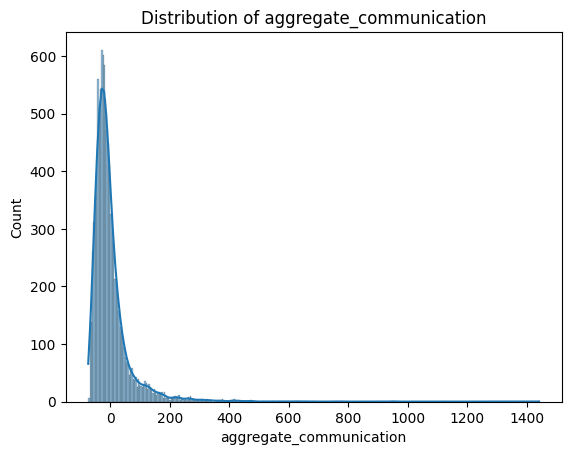

This is the scaled data- it should look exactly like the raw data, but with a different scale


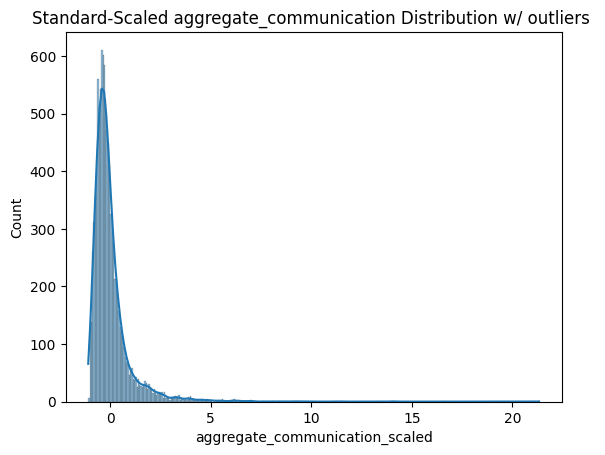

This is the lesioned data- it should have less outliers


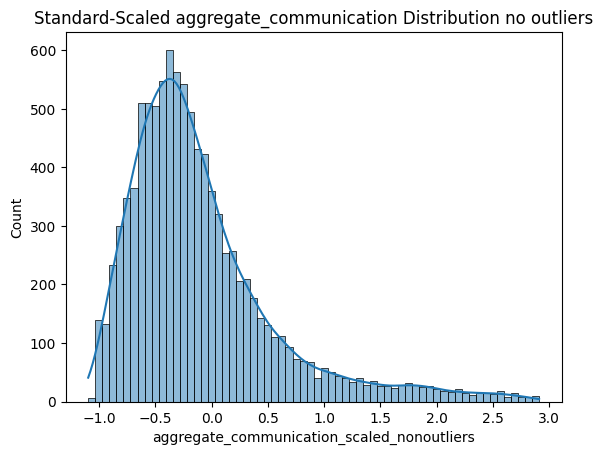

More lesioned data but in new  dataframe-- should look exactly like above


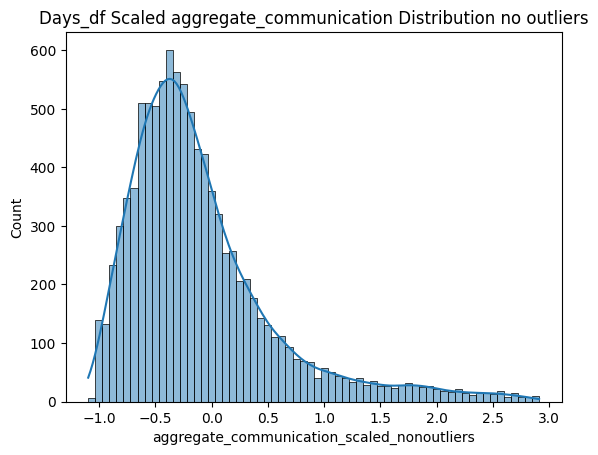

In [35]:
### Plot scaling and removal of outliers 
pre.plot_normalization(dfs_residuals['v1_day'], daily_cols_v1 + phq2_cols, num_to_plot=1, subject_to_plot=None)


In [46]:
### If chart tests above go through, run this:

##### Scale and drop outliers ######
to_regress_out = ['gender','education','race','age']                # covariates
to_ignore = ['participant_id','num_id','dt','week','day']  

# Scale and remove outliers for subset DFs
dfs_scaled = {}
for name, df in dfs_residuals.items():
    cols_to_scale = [col for col in df.columns.to_list() if (col not in to_regress_out) and (col not in to_ignore)]
    dfs_scaled[name] = pre.normalize_df(df, cols_to_scale)
    dfs_scaled[name].to_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'), index=False)
    print(f'Saved dfs_scaled[{name}] to {name}_scaled.csv')

# # Scale and remove outliers for week and day dfs, even though they're not residualized
df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))
scaled_df_alldays_int70 = pre.normalize_df(df_alldays_int70, daily_cols_v1 + phq2_cols + daily_v2_common + phq9_cols)
scaled_df_alldays_int70.to_csv(os.path.join(brighten_dir, 'scaled_df_alldays_int70.csv'), index=False)

week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))
scaled_df_week_int70 = pre.normalize_df(week_df_int70, daily_cols_v1 + phq2_cols + daily_v2_common + phq9_cols)
scaled_df_week_int70.to_csv(os.path.join(brighten_dir, 'scaled_df_week_int70.csv'), index=False)





Saved dfs_scaled[v1_day] to v1_day_scaled.csv
Saved dfs_scaled[v2_day] to v2_day_scaled.csv
Saved dfs_scaled[v1_week] to v1_week_scaled.csv
Saved dfs_scaled[v2_week] to v2_week_scaled.csv


/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_6799/1394191561.py:16: DtypeWarning: Columns (14,23,48,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))
/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_6799/1394191561.py:20: DtypeWarning: Columns (24,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))


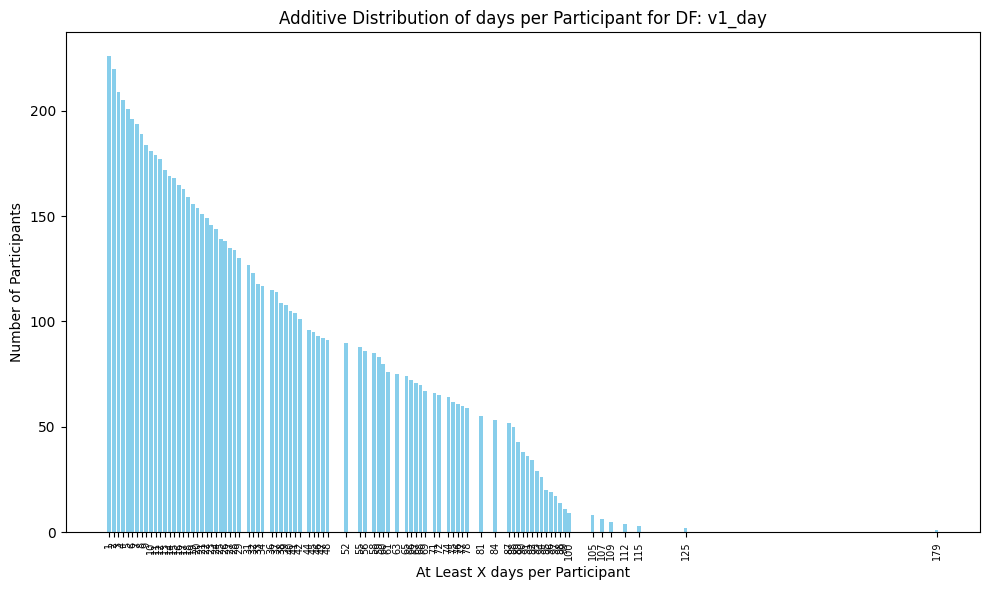

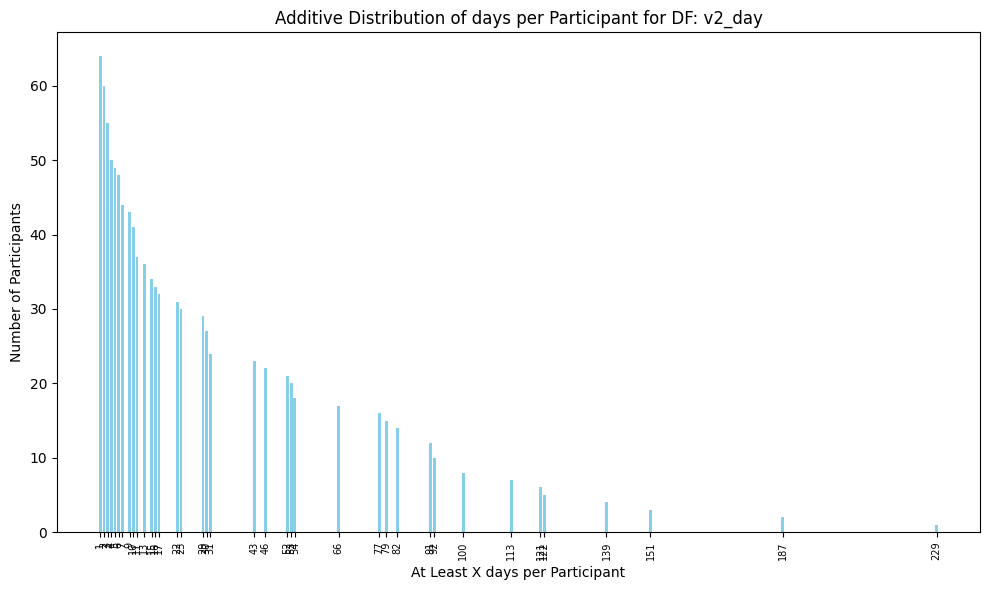

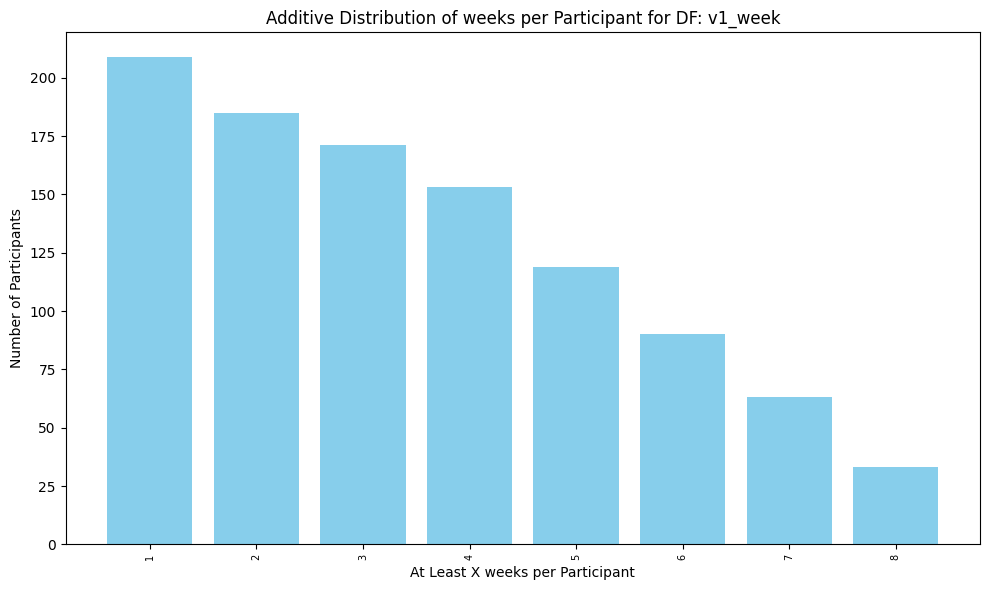

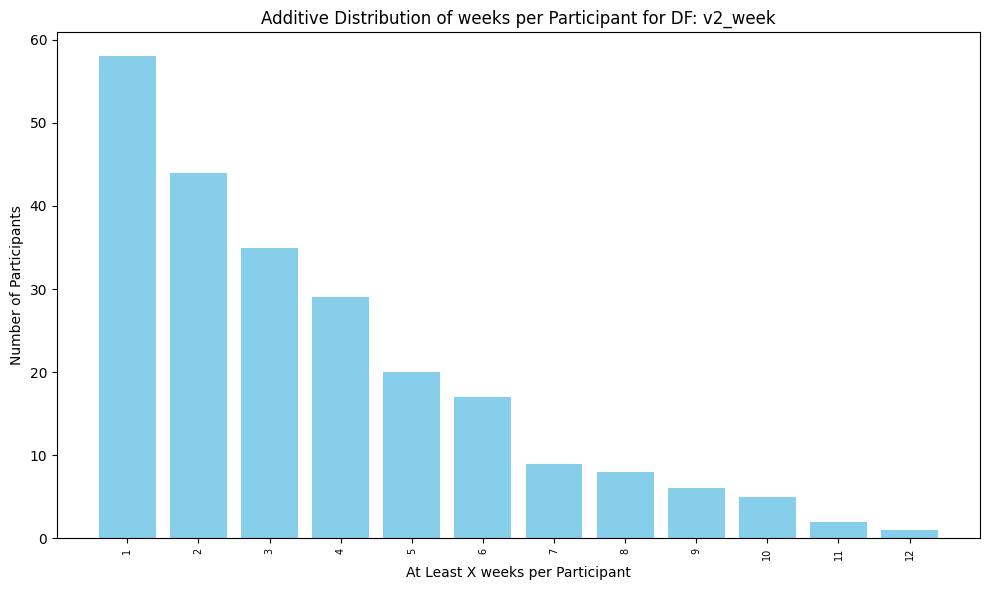

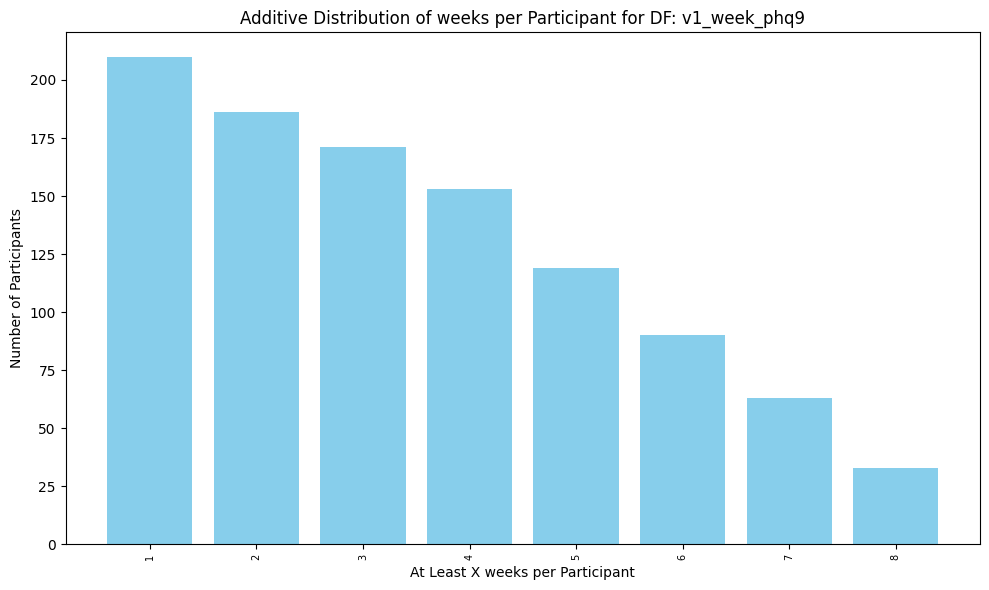

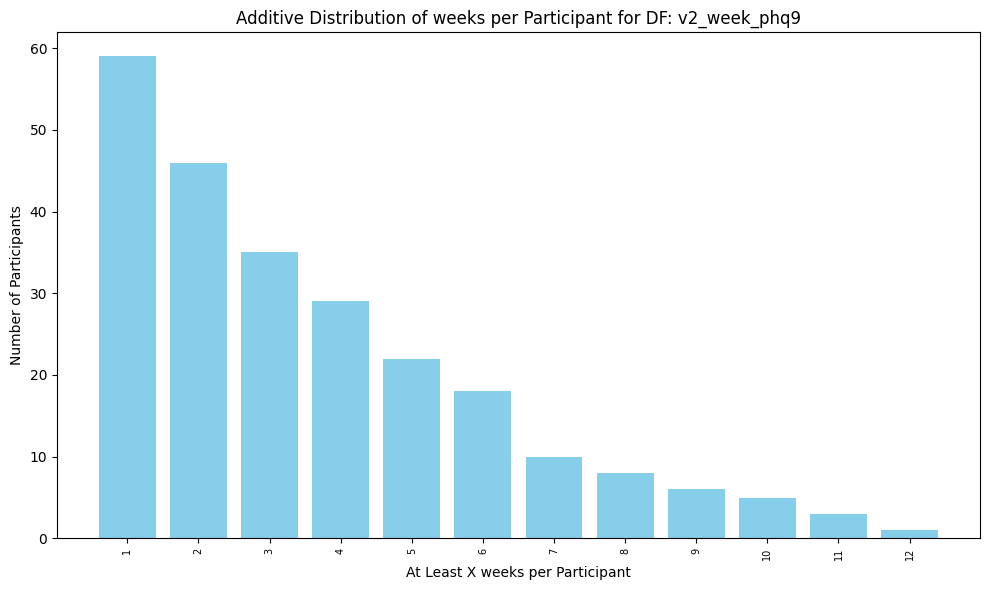

In [37]:
############## Plot-- how many weeks/days does each participant have #############
for name, df in dfs_scaled.items():
    if 'day' in name:
        vis.plot_participants_per_time(df, time_period='day', title=name)
    elif 'week' in name:
        vis.plot_participants_per_time(df, time_period='week', title=name)



In [45]:
### Create lag variable
dfs_lagged = {}
for name, df in dfs_scaled.items():
    print(f'\n\nFor {name}:')
    if 'week' in name:
        dfs_lagged[name] = pre.create_lag_variables(df, phq9_cols + phq2_cols)
    if 'day' in name:
        dfs_lagged[name] = pre.create_lag_variables(df, phq2_cols)
    
    dfs_lagged[name].to_csv(os.path.join(brighten_dir, f'{name}_lag.csv'), index=False)
    




For v1_day:

 Adding lag of -1 to column: phq2_1 -> phq2_1_lag-1
col df shape is: (10226, 3)

 Adding lag of -1 to column: phq2_2 -> phq2_2_lag-1
col df shape is: (10226, 3)

 Adding lag of -1 to column: phq2_sum -> phq2_sum_lag-1
col df shape is: (10226, 3)


For v2_day:

 Adding lag of -1 to column: phq2_1 -> phq2_1_lag-1
col df shape is: (2651, 3)

 Adding lag of -1 to column: phq2_2 -> phq2_2_lag-1
col df shape is: (2651, 3)

 Adding lag of -1 to column: phq2_sum -> phq2_sum_lag-1
col df shape is: (2651, 3)


For v1_week:

 Adding lag of -1 to column: phq9_1 -> phq9_1_lag-1
col df shape is: (1023, 3)

 Adding lag of -1 to column: phq9_2 -> phq9_2_lag-1
col df shape is: (1023, 3)

 Adding lag of -1 to column: phq9_3 -> phq9_3_lag-1
col df shape is: (1023, 3)

 Adding lag of -1 to column: phq9_4 -> phq9_4_lag-1
col df shape is: (1023, 3)

 Adding lag of -1 to column: phq9_5 -> phq9_5_lag-1
col df shape is: (1023, 3)

 Adding lag of -1 to column: phq9_6 -> phq9_6_lag-1
col df shape 

KeyError: "['phq2_1'] not in index"